# fit GLM for bold baselining HCP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/tank/klundert/projects/cfdn/prfpy_cfdn/')
import os
import numpy as np
import preprocess
import cortex as cx
import numpy as np
import scipy as sp
import nilearn as nl
from nilearn.surface import load_surf_data
import os, shutil, urllib.request
import cortex as cx
from matplotlib import rc
import nibabel as nb
from nibabel import cifti2
import h5py
import matplotlib.pyplot as plt

In [3]:
subject = 'sub-02'
deriv_dir = '/scratch/2021/nprf_ss/derivatives/'
scalar_dir = '/tank/klundert/projects/means_hcp999999/'
ldtr_dir = '/tank/klundert/projects/detrend_psc_hcp999999/'
sbj = preprocess.participant(subject, deriv_dir, scalar_dir, ldtr_dir)

In [4]:
sbj.sessions
X_conv = np.array([np.ones(115), np.arange(115)]).T
# idx_baseline = np.array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
#         13,  14,  15,  16,  61,  62,  63,  64,  65,  66,  67,  68, 113,
#        114, 115, 116, 117, 118, 119])

# all TR indices where there is no stimulus on the screen excluding first 5
idx_baseline = np.array([5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  61,  62,  63,  64,  65,  66,  67,  68, 113,
       114, 115, 116, 117, 118, 119])-5 
sbj.linear_detrend_psc(X_conv, idx_baseline, 5)

/tank/klundert/projects/cfdn/prfpy_cfdn/preprocess.py:175: RuntimeWarning: invalid value encountered in divide
  psc_data = ((ldt_data - baseline) / baseline) * 100


In [5]:
sbj.prep_dir

'/scratch/2021/nprf_ss/derivatives/fmriprep/sub-02'

In [6]:
sbj.get_scalars()

In [7]:
sbj.subject

'sub-02'

In [8]:
sbj.get_folds_detrend(remove_edge=True)

processing ses-01


/tank/klundert/anaconda3/envs/cf/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


processing ses-02
processing ses-03
processing ses-04


/tank/klundert/projects/cfdn/prfpy_cfdn/preprocess.py:307: RuntimeWarning: Mean of empty slice
  self.data_train = np.nanmean(np.array(data[::2]), axis=0)
/tank/klundert/projects/cfdn/prfpy_cfdn/preprocess.py:308: RuntimeWarning: Mean of empty slice
  self.data_test = np.nanmean(np.array(data[1::2]), axis=0)


In [9]:
all_data = list(sbj.data)
if subject == 'sub-02':
    print(len(all_data))
else:
    print(len(all_data))
    del all_data[8]
    del all_data[6]
    print(len(all_data))

46


In [10]:
data_train = np.nanmean(np.array(all_data[::2]), axis=0)
data_test = np.nanmean(np.array(all_data[1::2]), axis=0)

mean_all = np.nanmean(np.array(all_data), axis=0)

np.save(f'/tank/klundert/projects/hcp_data_folds/{subject}/data_fold1_detrend_{subject}_psc_hcp.npy', data_train)
np.save(f'/tank/klundert/projects/hcp_data_folds/{subject}/data_fold2_detrend_{subject}_psc_hcp.npy', data_test)
np.save(f'/tank/klundert/projects/hcp_data_folds/{subject}/data_all_detrend_{subject}_psc_hcp.npy', mean_all)

/tmp/ipykernel_3415897/2408716565.py:1: RuntimeWarning: Mean of empty slice
  data_train = np.nanmean(np.array(all_data[::2]), axis=0)
/tmp/ipykernel_3415897/2408716565.py:2: RuntimeWarning: Mean of empty slice
  data_test = np.nanmean(np.array(all_data[1::2]), axis=0)
/tmp/ipykernel_3415897/2408716565.py:4: RuntimeWarning: Mean of empty slice
  mean_all = np.nanmean(np.array(all_data), axis=0)


In [11]:
np.save(f'/tank/klundert/projects/hcp_data_folds/{subject}/data_fold1_detrend_{subject}_zsc_hcp.npy', np.divide(data_train, np.std(data_train, axis=1)[:,None]))
np.save(f'/tank/klundert/projects/hcp_data_folds/{subject}/data_fold2_detrend_{subject}_zsc_hcp.npy', np.divide(data_test, np.std(data_test, axis=1)[:,None]))
np.save(f'/tank/klundert/projects/hcp_data_folds/{subject}/data_all_detrend_{subject}_zsc_hcp.npy', np.divide(mean_all, np.std(mean_all, axis=1)[:,None]))

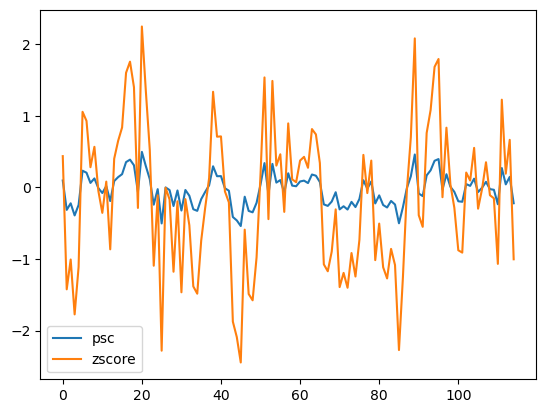

In [12]:
plt.figure()
plt.plot(data_train[10000,:].T, label='psc')
plt.plot(data_train[10000,:].T/np.std(data_train[10000,:].T), label='zscore')
plt.legend()